## 1. Проблема

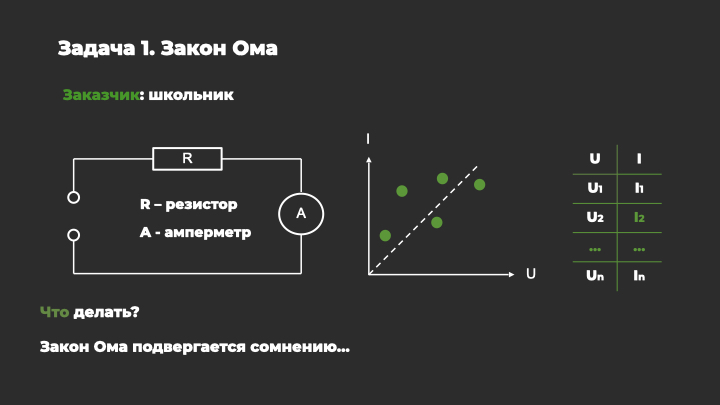

## 2. Содержательная постановка задачи

Необходимо провести проверку соблюдения закона Ома для участка цепи, состоящего из элемента питания, резистора и амперметра, подключенных последовательно. Известны значения напряжения, а также значения силы тока на участке цепи.

## 3. Формальная мат. модель

Пусть
$U = {U_1,U_2,\dots,U_n}$ - пространство зафиксированных (подаваемых) значений напряжения на участок цепи.
$I = {I_1,I_2,\dots,I_n}$ - простраство случайных (измеренных) значений силы тока в участке цепи.  

Задача:  
$\textrm{MSE} \rightarrow \min$  

Условия:  
$U_n > 0$  
$I_n > 0$  
$w > 0$  

## 4. Алгоритм и ПО

Мы предполагаем, что согласно закону Ома для участка цепи ($I = \frac{U}{R}$) истинная связь между $U$ и $I$ является линейной, плюс некоторая случайная ошибка:

$$
I_i = f(w,U_i)+\varepsilon_i
$$

Предполагается, что случайная ошибка  распределена нормально с нулевым матожиданием и фиксированной дисперсией $\sigma _{\varepsilon }^{2}$ (белый шум), которая не зависит от переменных $U$ и $I$.

В данном случае в качестве веса будет выступать проводимость $\frac{1}{R}$, т.е $w = \frac{1}{R}$

Проверку состоятельности модели закона Ома будем проводить рассчитывая коэффициент детерминации $\mathbf{R}^2$.

**Интерпретация**

* Коэффициент детерминации принимает значения от 0 до 1.
* Для приемлемых моделей коэффициент должен быть не меньше 50 %.
* Модели с коэффициентом детерминации выше 80 % можно признать достаточно хорошими.
* Коэффициент может быть отрицательным, это говорит о крайней неадекватности модели: простое среднее приближает лучше.

В качестве алгоритма будем использовать МНК

В качестве ПО будем использовать ЯП python, с подключенными модулями:

* numpy - для работы с линейной алгеброй
* sklearn - для линейной регрессии
* seaborn, matplotlib - для построения графиков

## 5. Решение задачи

In [49]:
# Подключаем необходимые для решения задачи библиотеки
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

В качестве примера, допустим, что резистор обладает номинальной мощностью рассеивания 2 Вт.  
Для начала создадим нормальный белый шум размера N с нулевым средним и единичной дисперсией. Его график совершенно хаотичен

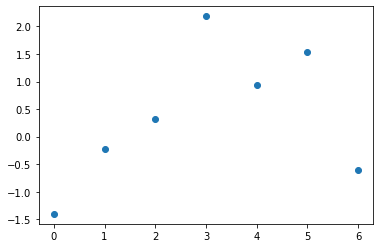

In [50]:
N = 7 # Количество наблюдений

mu = 0
sigma = 1
R = 2

eps = np.random.normal(mu, sigma, size=N)
plt.scatter(np.arange(N),eps)

<AxesSubplot:>

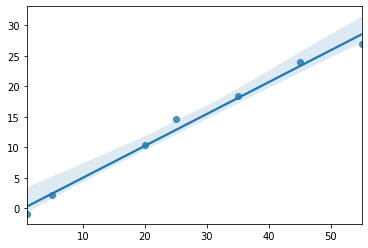

In [54]:
sns.regplot(x=U, y=I)

Из него видно, что зависимость линейная. Соответственно закон Ома выполняется.

In [51]:
# Вносим данные и добавляем к ним шум
U = np.array([1, 5, 20, 25, 35, 45, 55])
I = U/R + eps

In [52]:
# Обучим модель на полученных данных
U=np.reshape(U,(N,1))
I=np.reshape(I,(N,1))
model = LinearRegression(fit_intercept = False).fit(U, I)

r_square = model.score(U, I)
w = model.coef_

print('Коэффициент детерминации:', r_sq)
print('Проводимость:', w[0][0])

Коэффициент детерминации: 0.9669999878497746
Проводимость: 0.5173400452809942


## 6. Анализ

Исходя из вычисленного коэффициента детерминации - доли объясненной моделью дисперсии, получаем:

In [53]:
if r_square >= 0.8:
    print('Модель хорошая. Закон Ома выполняется')
elif r_square >= 0.5:
    print('Модель приемлемая. Закон Ома выполняется')
else:
    print('Модель непримемлемая. Закон Ома не выполняется')

Модель хорошая. Закон Ома выполняется


Построим график